## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Feature engineering](#Engineering)
4. [Modelling](#Modelling)
5. [Making predictions of the test set and creating a submission file](#Predictions)

<a name="Libraries"></a>
## 1. Importing libraries


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

<a name="Data"></a>
## 2. Loading and previewing data

In [3]:
DATA_PATH = r'C:\Users\ADMIN\Desktop\co2em\playground-series-s3e20'
# Load files
train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
samplesubmission = pd.read_csv(os.path.join(DATA_PATH, 'sample_submission.csv'))

# Preview train dataset
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51000,29.29000,2019,0,-0.00011,0.60302,-0.00007,0.25567,-98.59389,...,3664.43622,61085.80957,2615.12048,15.56853,0.27229,-12.62899,35.63242,-138.78642,30.75214,3.75099
1,ID_-0.510_29.290_2019_01,-0.51000,29.29000,2019,1,0.00002,0.72821,0.00001,0.13099,16.59286,...,3651.19031,66969.47873,3174.57242,8.69060,0.25683,30.35938,39.55763,-145.18393,27.25178,4.02518
2,ID_-0.510_29.290_2019_02,-0.51000,29.29000,2019,2,0.00051,0.74820,0.00038,0.11002,72.79584,...,4216.98649,60068.89445,3516.28267,21.10341,0.25110,15.37788,30.40182,-142.51954,26.19330,4.23138
3,ID_-0.510_29.290_2019_03,-0.51000,29.29000,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.50774,51064.54734,4180.97332,15.38690,0.26204,-11.29340,24.38036,-132.66583,28.82915,4.30529
4,ID_-0.510_29.290_2019_04,-0.51000,29.29000,2019,4,-0.00008,0.67630,-0.00005,0.12116,4.12127,...,3980.59812,63751.12578,3355.71011,8.11469,0.23585,38.53226,37.39298,-141.50981,22.20461,4.34732


In [4]:
# Preview test dataset
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51000,29.29000,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.02734,8472.31348,41047.93750,7472.31348,7.93562,0.24077,-100.11379,33.69704,-133.04755,33.77958
1,ID_-0.510_29.290_2022_01,-0.51000,29.29000,2022,1,0.00046,0.69116,0.00032,0.00000,76.23920,...,48539.73724,6476.14732,54915.70858,5476.14716,11.44844,0.29312,-30.51032,42.40259,-138.63282,31.01238
2,ID_-0.510_29.290_2022_02,-0.51000,29.29000,2022,2,0.00016,0.60511,0.00011,0.07987,-42.05534,...,34133.08047,8984.79570,39006.09375,7984.79570,10.75318,0.26713,39.08736,45.93648,-144.78499,26.74336
3,ID_-0.510_29.290_2022_03,-0.51000,29.29000,2022,3,0.00035,0.69692,0.00024,0.20103,72.16957,...,50854.99108,6014.72406,57646.36837,5014.72412,11.76456,0.30468,-24.46513,42.14042,-135.02789,29.60477
4,ID_-0.510_29.290_2022_04,-0.51000,29.29000,2022,4,-0.00032,0.58053,-0.00018,0.20435,76.19086,...,46594.68514,6849.28048,52896.54187,5849.28039,13.06532,0.28422,-12.90785,30.12264,-135.50012,26.27681


In [5]:
# Preview sample submission file
samplesubmission.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,81.94000
1,ID_-0.510_29.290_2022_01,81.94000
2,ID_-0.510_29.290_2022_02,81.94000
3,ID_-0.510_29.290_2022_03,81.94000
4,ID_-0.510_29.290_2022_04,81.94000


In [6]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((79023, 76), (24353, 75), (24353, 2))

In [7]:
# Train to test sets ratio
(test.shape[0]) / (train.shape[0] + test.shape[0])

0.23557692307692307

<a name="Engineering"></a>
## 2. Feature engineering








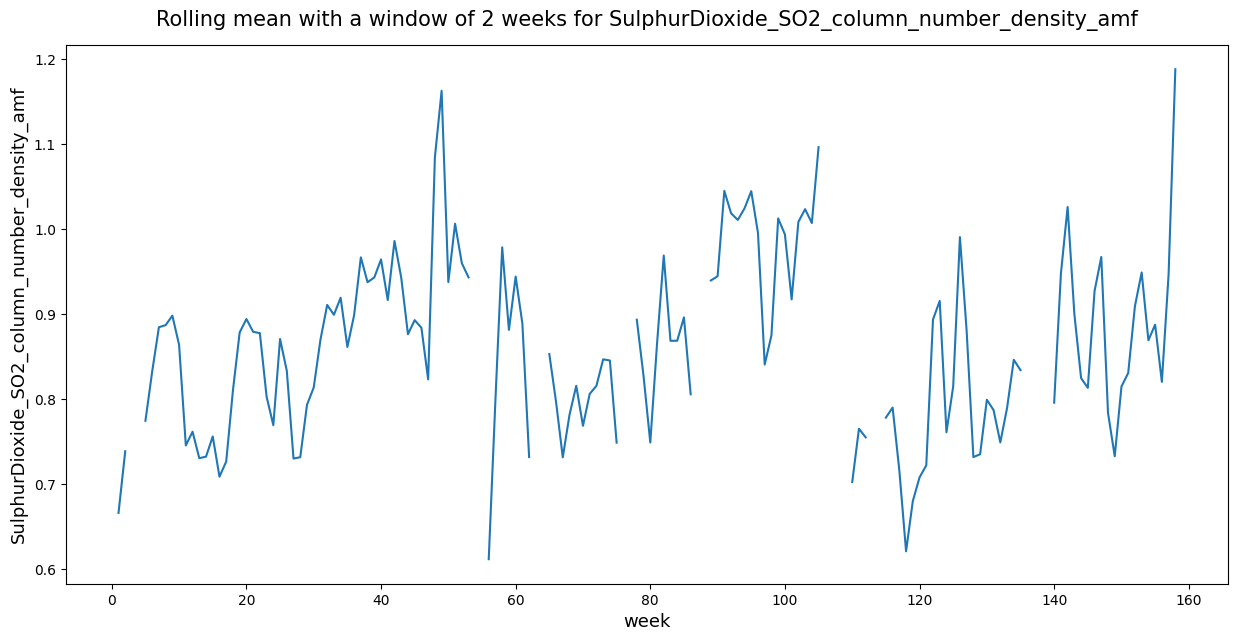

In [27]:
# Examples of feature engineering - Aggregations, cumulative differences, moving averages ...
# Lets explore the rolling mean
# First we create a unique location from lat lon
train['location'] = [str(x) + '_' + str(y) for x, y in zip(train.latitude, train.longitude)]

# Filter based on one location
example_loc = train[train.location == '-0.51_29.29']

# Calculate rolling mean for SulphurDioxide_SO2_column_number_density_amf with a window of 2 weeks
rolling_mean = example_loc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window = 2).mean()

# Visualise rolling mean
plt.figure(figsize = (15, 7))
rolling_mean.plot()
plt.title('Rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf', y = 1.02, fontsize = 15)
plt.xlabel('week', y = 1.05, fontsize = 13)
plt.ylabel('SulphurDioxide_SO2_column_number_density_amf', x = 1.05, fontsize = 13)
plt.show()

 - Emmissions have a cyclic pattern that we saw in the [EDA Notebook](https://www.kaggle.com/code/kenpachi99/hackathon-getting-started-eda) - This will be helpful to our model
 - With more research and domain knowledge generate useful features that can improve your model performance

 Other examples of feature engineering:
  - Creating cluster regions
  - Interactions between different pollutatnts - ratios, additions,subtractions...
  - Time series features

In [28]:
# Generate the above feature - rolling mean for all locations for both the train and test

# Feature engineering train
train_roll_mean = train.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[train.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
train_roll_mean.drop(['level_1', 'emission', 'location'], axis = 1, inplace = True)
train_roll_mean.columns = [col + '_roll_mean' for col in train_roll_mean.columns]

# Feature engineering test
test.latitude, test.longitude = round(test.latitude, 2), round(test.longitude, 2)
test['location'] = [str(x) + '_' + str(y) for x, y in zip(test.latitude, test.longitude)]
test_roll_mean = test.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[test.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
test_roll_mean.drop(['level_1', 'location'], axis = 1, inplace = True)
test_roll_mean.columns =  [col + '_roll_mean' for col in test_roll_mean.columns]
test_roll_mean.head()

,SulphurDioxide_SO2_column_number_density_roll_mean,SulphurDioxide_SO2_column_number_density_amf_roll_mean,SulphurDioxide_SO2_slant_column_number_density_roll_mean,SulphurDioxide_cloud_fraction_roll_mean,SulphurDioxide_sensor_azimuth_angle_roll_mean,SulphurDioxide_sensor_zenith_angle_roll_mean,SulphurDioxide_solar_azimuth_angle_roll_mean,SulphurDioxide_solar_zenith_angle_roll_mean,SulphurDioxide_SO2_column_number_density_15km_roll_mean,CarbonMonoxide_CO_column_number_density_roll_mean,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42280.88229,7474.23040,47981.82304,6474.23032,9.69203,0.26695,-65.31206,38.04982,-135.84018,32.39598
2,0.00031,0.64814,0.00021,0.03993,17.09193,27.74483,-138.71941,29.47540,0.00011,0.03772,...,41336.40886,7730.47151,46960.90116,6730.47143,11.10081,0.28012,4.28852,44.16954,-141.70891,28.87787
3,0.00026,0.65101,0.00017,0.14045,15.05711,49.37580,-144.95421,25.93065,0.00007,0.03877,...,42494.03577,7499.75988,48326.23106,6499.75991,11.25887,0.28590,7.31112,44.03845,-139.90644,28.17407
4,0.00002,0.63872,0.00003,0.20269,74.18022,37.25428,-144.39710,23.06746,0.00001,0.03949,...,48724.83811,6432.00227,55271.45512,5432.00225,12.41494,0.29445,-18.68649,36.13153,-135.26400,27.94079


In [29]:
# Merge engineered features with train and test set

#Train
train_eng = train.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(train_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Test
test_eng = test.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(test_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Preview engineered test set
test_eng.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,ID_-0.510_29.290_2022_00,-0.51000,29.29000,2022,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_-0.510_29.290_2022_01,-0.51000,29.29000,2022,1,0.00046,0.69116,0.00032,0.00000,76.23920,...,42280.88229,7474.23040,47981.82304,6474.23032,9.69203,0.26695,-65.31206,38.04982,-135.84018,32.39598
2,ID_-0.510_29.290_2022_02,-0.51000,29.29000,2022,2,0.00016,0.60511,0.00011,0.07987,-42.05534,...,41336.40886,7730.47151,46960.90116,6730.47143,11.10081,0.28012,4.28852,44.16954,-141.70891,28.87787
3,ID_-0.510_29.290_2022_03,-0.51000,29.29000,2022,3,0.00035,0.69692,0.00024,0.20103,72.16957,...,42494.03577,7499.75988,48326.23106,6499.75991,11.25887,0.28590,7.31112,44.03845,-139.90644,28.17407
4,ID_-0.510_29.290_2022_04,-0.51000,29.29000,2022,4,-0.00032,0.58053,-0.00018,0.20435,76.19086,...,48724.83811,6432.00227,55271.45512,5432.00225,12.41494,0.29445,-18.68649,36.13153,-135.26400,27.94079


<a name="Modelling"></a>
## 3.  Modelling

In [ ]:
# # Selecting the independent variables and the target variable

# X = train_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis = 1).fillna(0)
# y = train_eng.emission

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# # Instantiating the model
# clf = RandomForestRegressor(random_state = SEED, n_jobs=-1)
# clf.fit(X_train, y_train)

# # Making predictions
# y_pred = clf.predict(X_test)

# # Measuring the accuracy of the model
# print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') # 27.46875858227988


# from sklearn.metrics import mean_squared_error
# import numpy as np

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f'RMSE Score: {rmse}')


In [17]:
X_test.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
42962,-1.96800,30.93200,2019,32,-0.00031,0.71053,-0.00022,0.05047,16.57960,45.51030,...,57419.29103,5330.79123,61552.54148,4654.78256,10.79548,0.24813,-31.46791,47.36010,-49.75059,28.81543
20489,-1.32700,30.97300,2021,31,-0.00005,0.83240,-0.00004,0.10846,17.56284,35.96635,...,61520.93314,4065.66013,69494.58153,3112.44794,10.74455,0.21591,6.19150,43.89503,-43.85110,28.08377
49300,-2.17100,28.62900,2019,10,0.00008,0.82463,0.00006,0.09100,74.80393,32.09079,...,48901.16490,4626.37383,54412.81630,3896.92843,24.60350,0.26977,-2.84187,38.80104,-98.31160,19.79850
13289,-1.11700,29.88300,2020,39,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,52079.15598,5787.26982,58881.23696,4798.99914,28.16117,0.26420,10.87889,40.55605,-92.68547,23.21665
31375,-1.64100,31.25900,2019,52,0.00004,0.75535,0.00003,0.22451,75.46359,25.12664,...,44224.48788,7041.88831,50164.00427,6057.84949,15.27048,0.26619,11.59058,37.11346,-140.04970,29.57884


In [18]:
# Analyse predictions
pred_errors = X_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = y_pred
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
pred_errors.head()

,latitude,longitude,year,week_no,emission,prediction,error
46437,-2.07900,29.32100,2019,9,1044.48450,2918.38815,1873.90365
46490,-2.07900,29.32100,2020,9,1011.02600,2802.89184,1791.86584
56674,-2.37800,29.22200,2020,17,1502.66770,2072.05161,569.38391
56679,-2.37800,29.22200,2020,22,1689.61380,2221.26626,531.65246
56671,-2.37800,29.22200,2020,14,1777.71030,2247.92992,470.21962


In [19]:
pred_errors.tail()

,latitude,longitude,year,week_no,emission,prediction,error
33962,-1.73000,28.47000,2020,42,0.00000,0.00000,0.00000
33999,-1.73000,28.47000,2021,26,0.00000,0.00000,0.00000
20584,-1.32800,28.87200,2020,20,0.00000,0.00000,0.00000
33869,-1.73000,28.47000,2019,2,0.00000,0.00000,0.00000
28239,-1.53200,28.56800,2020,43,0.00000,0.00000,0.00000


In [20]:
train.emission.describe()

count   79023.00000
mean       81.94055
std       144.29965
min         0.00000
25%         9.79800
50%        45.59345
75%       109.54959
max      3167.76800
Name: emission, dtype: float64

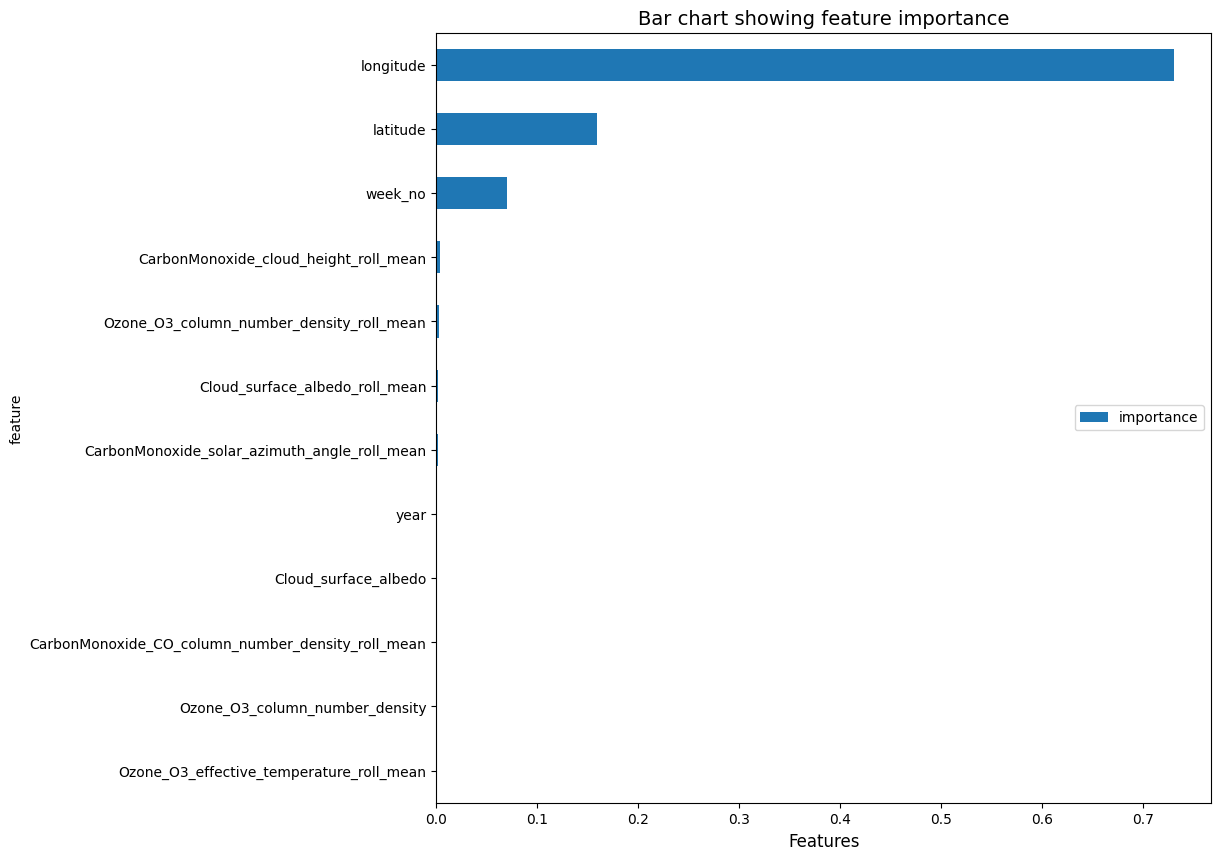

In [21]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

Training with 144 features
RMSE Score: 27.502521889102997
Model trained successfully!
RMSE Score: 27.502522
Complete model package saved to emission_model_complete.pkl


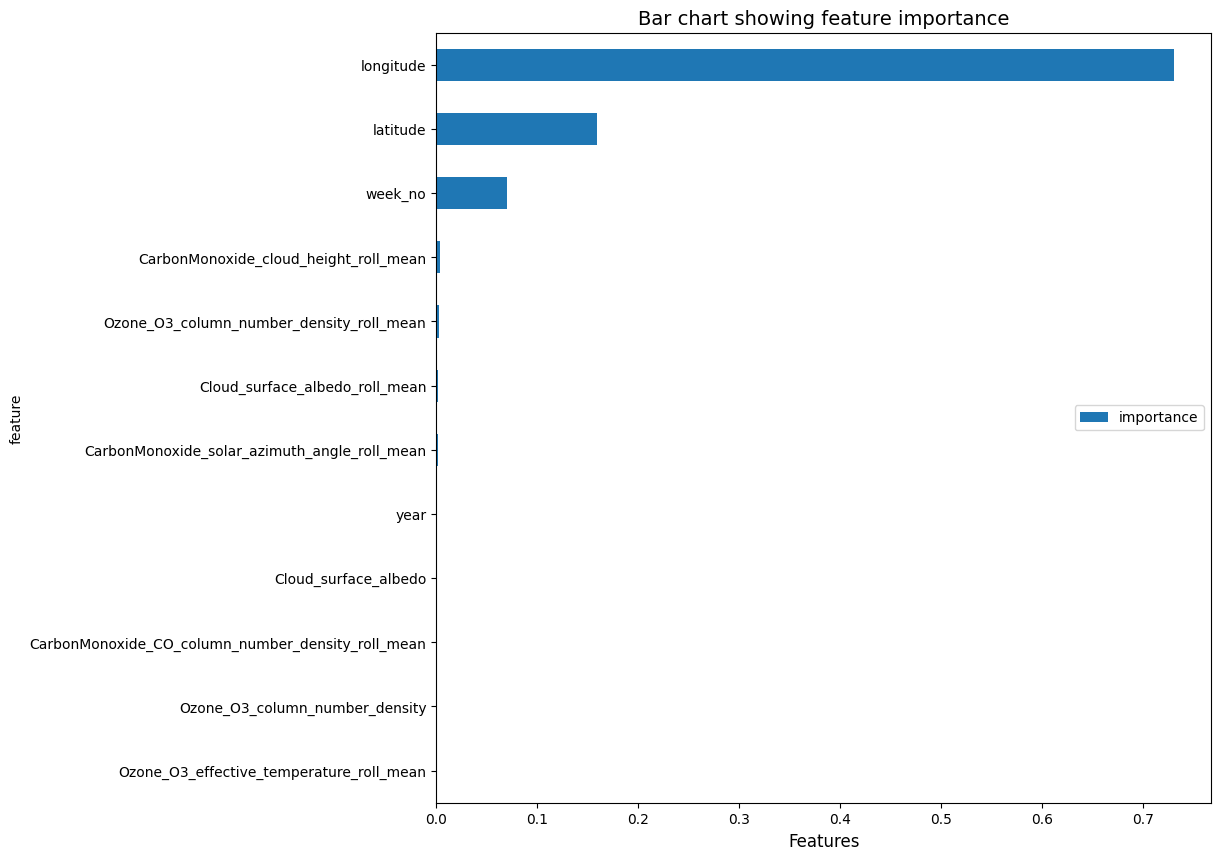


🎉 MODEL READY FOR REAL-TIME PREDICTIONS!
✓ Model saved as: emission_model_complete.pkl
✓ Features: 144
✓ RMSE: 27.502522


In [33]:
import joblib
import warnings
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

class ModelManager:
    def __init__(self):  # Fixed: __init__ not *init*
        self.model = None
        self.feature_names = None
        self.feature_defaults = None
        self.model_metadata = {}
    
    def prepare_and_train(self, train_eng, target_col='emission', test_size=0.3, random_state=2023):
        """Train model and prepare all necessary components"""
        
        # Prepare features and target
        X = train_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location', target_col], axis=1, errors='ignore').fillna(0)
        y = train_eng[target_col]
        
        # Store feature information
        self.feature_names = X.columns.tolist()
        self.feature_defaults = dict(X.mean())  # Use mean values as defaults
        
        print(f"Training with {len(self.feature_names)} features")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        # Train model
        self.model = RandomForestRegressor(random_state=random_state, n_jobs=-1)
        self.model.fit(X_train, y_train)
        
        # Evaluate
        y_pred = self.model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f'RMSE Score: {rmse}')
        
        # Store metadata - FIXED: Use __version__ instead of version
        self.model_metadata = {
            'rmse': rmse,
            'n_features': len(self.feature_names),
            'n_samples': len(X_train),
            'sklearn_version': joblib.__version__  # FIXED: Changed from joblib.version
        }
        
        print(f"Model trained successfully!")
        print(f"RMSE Score: {rmse:.6f}")
        
        return self.model, X_test, y_test, y_pred
    
    def save_complete_model(self, model_path='emission_model_complete.pkl'):
        """Save model with all necessary components"""
        if self.model is None:
            raise ValueError("No model trained yet. Call prepare_and_train() first.")
        
        model_package = {
            'model': self.model,
            'feature_names': self.feature_names,
            'feature_defaults': self.feature_defaults,
            'metadata': self.model_metadata
        }
        
        # Save with joblib
        joblib.dump(model_package, model_path)
        print(f"Complete model package saved to {model_path}")
        return model_path

# Initialize and train model
manager = ModelManager()
clf, X_test, y_test, y_pred = manager.prepare_and_train(train_eng)

# Save the complete model package
model_path = manager.save_complete_model('emission_model_complete.pkl')

# Feature importance (keep this from original code)
impo_df = pd.DataFrame({'feature': manager.feature_names, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by='importance', ascending=False)
impo_df = impo_df[:12].sort_values(by='importance', ascending=True)
impo_df.plot(kind='barh', figsize=(10, 10))
plt.legend(loc='center right')
plt.title('Bar chart showing feature importance', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.show()

print(f"\n🎉 MODEL READY FOR REAL-TIME PREDICTIONS!")
print(f"✓ Model saved as: {model_path}")
print(f"✓ Features: {len(manager.feature_names)}")
print(f"✓ RMSE: {manager.model_metadata['rmse']:.6f}")

In [ ]:
# # SAVE THE MODEL (Method 1 - using joblib - RECOMMENDED)
# joblib.dump(clf, './emission_prediction_model.pkl')

# # SAVE THE MODEL (Method 2 - using pickle)
# with open('./emission_model_pickle.pkl', 'wb') as file:
#     pickle.dump(clf, file)

# # Save feature names for future reference
# feature_names = X.columns.tolist()
# joblib.dump(feature_names, './feature_names.pkl')

# print("Model saved successfully!")
# print(f"Model trained on {len(X_train)} samples")
# print(f"Number of features: {len(feature_names)}")


Model saved successfully!
Model trained on 55316 samples
Number of features: 144


## 4. Making predictions of the test set and creating a submission file

In [26]:
# Make prediction on the test set
test_df = test_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location'], axis = 1).fillna(0)
predictions = clf.predict(test_df)

# # Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test_eng.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
sub_file.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.70971
1,ID_-0.510_29.290_2022_01,4.24380
2,ID_-0.510_29.290_2022_02,4.25819
3,ID_-0.510_29.290_2022_03,4.32295
4,ID_-0.510_29.290_2022_04,4.08351


## Load Model and USE

In [34]:
# STEP 1: Load your saved model
import joblib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

class SimplePredictor:
    def __init__(self, model_path=r'C:\Users\ADMIN\Desktop\co2em\emission_model_complete.pkl'):
        """Load the saved model"""
        try:
            # Load the complete model package
            model_package = joblib.load(model_path)
            self.model = model_package['model']
            self.feature_names = model_package['feature_names']
            self.feature_defaults = model_package['feature_defaults']
            
            print(f"✓ Model loaded successfully!")
            print(f"✓ Total features: {len(self.feature_names)}")
            
        except FileNotFoundError:
            print("❌ Model file not found. Please train the model first.")
            raise
    
    def predict_emission(self, latitude, longitude, so2_density=None, no2_density=None, co_density=None, year=2023, week_no=25):
        """
        Predict emission using key parameters
        
        Parameters:
        - latitude: Location latitude
        - longitude: Location longitude  
        - so2_density: SulphurDioxide_SO2_column_number_density (optional)
        - no2_density: NitrogenDioxide_NO2_column_number_density (optional)
        - co_density: CarbonMonoxide_CO_column_number_density (optional)
        - year: Year (default 2023)
        - week_no: Week number (default 25)
        """
        
        # Create input data with all features
        input_data = {}
        
        # Fill all features with defaults first
        for feature in self.feature_names:
            input_data[feature] = self.feature_defaults[feature]
        
        # Update with provided values
        input_data['latitude'] = latitude
        input_data['longitude'] = longitude
        input_data['year'] = year
        input_data['week_no'] = week_no
        
        # Update gas densities if provided
        if so2_density is not None:
            input_data['SulphurDioxide_SO2_column_number_density'] = so2_density
            # Also update related SO2 features if they exist
            so2_features = [f for f in self.feature_names if 'SulphurDioxide' in f]
            for feature in so2_features:
                if 'roll_mean' in feature:
                    input_data[feature] = so2_density  # Use current value as rolling mean
        
        if no2_density is not None:
            input_data['NitrogenDioxide_NO2_column_number_density'] = no2_density
            # Also update related NO2 features
            no2_features = [f for f in self.feature_names if 'NitrogenDioxide' in f]
            for feature in no2_features:
                if 'roll_mean' in feature:
                    input_data[feature] = no2_density
        
        if co_density is not None:
            input_data['CarbonMonoxide_CO_column_number_density'] = co_density
            # Also update related CO features
            co_features = [f for f in self.feature_names if 'CarbonMonoxide' in f]
            for feature in co_features:
                if 'roll_mean' in feature:
                    input_data[feature] = co_density
        
        # Convert to DataFrame and predict
        df = pd.DataFrame([input_data])
        df = df[self.feature_names]  # Ensure correct order
        
        prediction = self.model.predict(df)[0]
        
        return prediction

# STEP 2: Initialize predictor
predictor = SimplePredictor('emission_model_complete.pkl')

# STEP 3: Make predictions with your data
print("🔍 Making predictions with different scenarios:")
print("=" * 60)

# Example 1: With all gas densities
emission1 = predictor.predict_emission(
    latitude=-0.51,
    longitude=29.29, 
    so2_density=0.000123,
    no2_density=0.000045,
    co_density=0.018
)
print(f"Scenario 1 - All gases: {emission1:.6f}")

# Example 2: Only SO2 density
emission2 = predictor.predict_emission(
    latitude=-0.51,
    longitude=29.29,
    so2_density=0.000200  # Higher SO2
)
print(f"Scenario 2 - High SO2: {emission2:.6f}")

# Example 3: Only location (defaults for gases)
emission3 = predictor.predict_emission(
    latitude=-1.25,
    longitude=36.82
)
print(f"Scenario 3 - Location only: {emission3:.6f}")

# Example 4: Different location with CO density
emission4 = predictor.predict_emission(
    latitude=0.35,
    longitude=32.58,
    co_density=0.025  # Higher CO
)
print(f"Scenario 4 - High CO: {emission4:.6f}")

print("\n" + "=" * 60)

# STEP 4: Real-time prediction function
def real_time_prediction_demo():
    """Simulate real-time predictions"""
    import time
    
    print("🚀 Real-time Emission Monitoring")
    print("Press Ctrl+C to stop\n")
    
    # Sample locations
    locations = [
        {"name": "Nairobi", "lat": -1.286389, "lon": 36.817223},
        {"name": "Kampala", "lat": 0.347596, "lon": 32.582520},
        {"name": "Kigali", "lat": -1.970579, "lon": 30.104429}
    ]
    
    try:
        for i in range(20):  # 20 predictions
            # Rotate through locations
            location = locations[i % len(locations)]
            
            # Simulate varying sensor readings
            so2 = np.random.normal(0.0001, 0.00005)  # Realistic SO2 variation
            no2 = np.random.normal(0.00005, 0.00002)  # Realistic NO2 variation
            co = np.random.normal(0.018, 0.005)      # Realistic CO variation
            
            # Make prediction
            emission = predictor.predict_emission(
                latitude=location["lat"],
                longitude=location["lon"],
                so2_density=so2,
                no2_density=no2,
                co_density=co,
                week_no=np.random.randint(1, 53)
            )
            
            # Determine status
            status = "🔴 HIGH" if emission > 100 else "🟡 MEDIUM" if emission > 50 else "🟢 LOW"
            
            print(f"[{i+1:2d}] {location['name']:8} | "
                  f"Emission: {emission:8.4f} {status} | "
                  f"SO2: {so2:.6f} | NO2: {no2:.6f} | CO: {co:.6f}")
            
            time.sleep(2)  # 2-second intervals
            
    except KeyboardInterrupt:
        print("\n✓ Monitoring stopped")

# STEP 5: Simple function for quick predictions
def quick_predict(lat, lon, so2=None, no2=None, co=None):
    """Quick prediction function"""
    return predictor.predict_emission(lat, lon, so2, no2, co)

# USAGE EXAMPLES:
print("\n📋 Quick Usage Examples:")
print("=" * 40)

# Quick predictions
result1 = quick_predict(-0.51, 29.29, so2=0.0001)
result2 = quick_predict(-1.25, 36.82, no2=0.00006, co=0.02)

print(f"Quick prediction 1: {result1:.6f}")
print(f"Quick prediction 2: {result2:.6f}")

# Uncomment to run real-time demo:
# real_time_prediction_demo()

✓ Model loaded successfully!
✓ Total features: 144
🔍 Making predictions with different scenarios:
Scenario 1 - All gases: 4.286299
Scenario 2 - High SO2: 4.284810
Scenario 3 - Location only: 194.490974
Scenario 4 - High CO: 58.347705


📋 Quick Usage Examples:
Quick prediction 1: 4.286030
Quick prediction 2: 191.975582


In [35]:
# Load predictor
predictor = SimplePredictor('./emission_model_complete.pkl')

# Make predictions with your data
emission = predictor.predict_emission(
    latitude=-0.51,      # Your latitude
    longitude=29.29,     # Your longitude  
    so2_density=0.000123, # SO2 density
    no2_density=0.000045, # NO2 density
    co_density=0.018      # CO density
)

print(f"Predicted emission: {emission:.6f}")

✓ Model loaded successfully!
✓ Total features: 144
Predicted emission: 4.286299


In [ ]:
import joblib
import pandas as pd
import numpy as np
import warnings
import time
from datetime import datetime
import random

warnings.filterwarnings('ignore')

class SimplePredictor:
    def __init__(self, model_path='emission_model_complete.pkl'):
        """Load the saved model"""
        try:
            model_package = joblib.load(model_path)
            self.model = model_package['model']
            self.feature_names = model_package['feature_names']
            self.feature_defaults = model_package['feature_defaults']
            print(f"Model loaded successfully! Features: {len(self.feature_names)}")
        except FileNotFoundError:
            print("Model file not found. Please train the model first.")
            raise
    
    def predict_emission(self, latitude, longitude, so2_density=None, no2_density=None, co_density=None, year=2023, week_no=25):
        """Predict emission using key parameters"""
        input_data = {}
        
        # Fill all features with defaults first
        for feature in self.feature_names:
            input_data[feature] = self.feature_defaults[feature]
        
        # Update with provided values
        input_data['latitude'] = latitude
        input_data['longitude'] = longitude
        input_data['year'] = year
        input_data['week_no'] = week_no
        
        # Update gas densities if provided
        if so2_density is not None:
            input_data['SulphurDioxide_SO2_column_number_density'] = so2_density
            so2_features = [f for f in self.feature_names if 'SulphurDioxide' in f]
            for feature in so2_features:
                if 'roll_mean' in feature:
                    input_data[feature] = so2_density
        
        if no2_density is not None:
            input_data['NitrogenDioxide_NO2_column_number_density'] = no2_density
            no2_features = [f for f in self.feature_names if 'NitrogenDioxide' in f]
            for feature in no2_features:
                if 'roll_mean' in feature:
                    input_data[feature] = no2_density
        
        if co_density is not None:
            input_data['CarbonMonoxide_CO_column_number_density'] = co_density
            co_features = [f for f in self.feature_names if 'CarbonMonoxide' in f]
            for feature in co_features:
                if 'roll_mean' in feature:
                    input_data[feature] = co_density
        
        # Convert to DataFrame and predict
        df = pd.DataFrame([input_data])
        df = df[self.feature_names]
        prediction = self.model.predict(df)[0]
        return prediction

class RealtimeEmissionMonitor:
    def __init__(self, model_path='emission_model_complete.pkl'):
        self.predictor = SimplePredictor(model_path)
        
        # Suggested locations based on major cities and industrial areas
        self.locations = [
            # Major African Cities (Industrial/Urban Areas)
            {"name": "Lagos, Nigeria", "lat": 6.5244, "lon": 3.3792, "type": "Industrial"},
            {"name": "Cairo, Egypt", "lat": 30.0444, "lon": 31.2357, "type": "Urban"},
            {"name": "Johannesburg, SA", "lat": -26.2041, "lon": 28.0473, "type": "Industrial"},
            {"name": "Nairobi, Kenya", "lat": -1.2921, "lon": 36.8219, "type": "Urban"},
            {"name": "Casablanca, Morocco", "lat": 33.5731, "lon": -7.5898, "type": "Industrial"},
            
            # Asian Industrial Centers
            {"name": "Mumbai, India", "lat": 19.0760, "lon": 72.8777, "type": "Industrial"},
            {"name": "Beijing, China", "lat": 39.9042, "lon": 116.4074, "type": "Industrial"},
            {"name": "Tokyo, Japan", "lat": 35.6762, "lon": 139.6503, "type": "Urban"},
            {"name": "Bangkok, Thailand", "lat": 13.7563, "lon": 100.5018, "type": "Urban"},
            {"name": "Jakarta, Indonesia", "lat": -6.2088, "lon": 106.8456, "type": "Industrial"},
            
            # European Cities
            {"name": "London, UK", "lat": 51.5074, "lon": -0.1278, "type": "Urban"},
            {"name": "Berlin, Germany", "lat": 52.5200, "lon": 13.4050, "type": "Urban"},
            {"name": "Milan, Italy", "lat": 45.4642, "lon": 9.1900, "type": "Industrial"},
            
            # American Cities
            {"name": "Los Angeles, USA", "lat": 34.0522, "lon": -118.2437, "type": "Industrial"},
            {"name": "Mexico City, Mexico", "lat": 19.4326, "lon": -99.1332, "type": "Urban"},
            {"name": "São Paulo, Brazil", "lat": -23.5558, "lon": -46.6396, "type": "Industrial"},
            
            # Remote/Clean Areas (for comparison)
            {"name": "Rural Montana, USA", "lat": 47.0527, "lon": -109.6333, "type": "Rural"},
            {"name": "Norwegian Coast", "lat": 69.6492, "lon": 18.9553, "type": "Clean"},
            {"name": "Amazon Basin", "lat": -3.4653, "lon": -62.2159, "type": "Clean"}
        ]
    
    def generate_realistic_sensor_data(self, location_type="Urban"):
        """Generate realistic sensor data based on location type"""
        
        # Base values and variations by location type
        sensor_profiles = {
            "Industrial": {
                "so2": {"mean": 0.00015, "std": 0.00008},
                "no2": {"mean": 0.00008, "std": 0.00004},
                "co": {"mean": 0.025, "std": 0.008}
            },
            "Urban": {
                "so2": {"mean": 0.00010, "std": 0.00005},
                "no2": {"mean": 0.00006, "std": 0.00003},
                "co": {"mean": 0.020, "std": 0.006}
            },
            "Rural": {
                "so2": {"mean": 0.00004, "std": 0.00002},
                "no2": {"mean": 0.00002, "std": 0.00001},
                "co": {"mean": 0.012, "std": 0.003}
            },
            "Clean": {
                "so2": {"mean": 0.00002, "std": 0.00001},
                "no2": {"mean": 0.00001, "std": 0.000005},
                "co": {"mean": 0.008, "std": 0.002}
            }
        }
        
        profile = sensor_profiles.get(location_type, sensor_profiles["Urban"])
        
        # Add daily and weekly variations
        hour = datetime.now().hour
        day_factor = 1.5 if 6 <= hour <= 18 else 0.8  # Higher during day
        
        return {
            "so2": max(0, np.random.normal(profile["so2"]["mean"] * day_factor, profile["so2"]["std"])),
            "no2": max(0, np.random.normal(profile["no2"]["mean"] * day_factor, profile["no2"]["std"])),
            "co": max(0, np.random.normal(profile["co"]["mean"] * day_factor, profile["co"]["std"]))
        }
    
    def get_emission_status(self, emission_value):
        """Determine emission status and color"""
        if emission_value > 100:
            return "HIGH", "RED"
        elif emission_value > 50:
            return "MEDIUM", "YELLOW"
        else:
            return "LOW", "GREEN"
    
    def run_realtime_monitoring(self, interval_seconds=3, duration_minutes=5):
        """Run real-time emission monitoring"""
        print("=" * 80)
        print("REAL-TIME EMISSION MONITORING SYSTEM")
        print("=" * 80)
        print(f"Monitoring Duration: {duration_minutes} minutes")
        print(f"Update Interval: {interval_seconds} seconds")
        print("Press Ctrl+C to stop early")
        print("=" * 80)
        
        start_time = time.time()
        end_time = start_time + (duration_minutes * 60)
        iteration = 1
        
        try:
            while time.time() < end_time:
                # Select random location
                location = random.choice(self.locations)
                
                # Generate realistic sensor data
                sensor_data = self.generate_realistic_sensor_data(location["type"])
                
                # Make prediction
                prediction_start = time.time()
                emission = self.predictor.predict_emission(
                    latitude=location["lat"],
                    longitude=location["lon"],
                    so2_density=sensor_data["so2"],
                    no2_density=sensor_data["no2"],
                    co_density=sensor_data["co"],
                    week_no=datetime.now().isocalendar()[1]
                )
                prediction_time = (time.time() - prediction_start) * 1000
                
                # Get status
                status, color = self.get_emission_status(emission)
                
                # Display results
                timestamp = datetime.now().strftime("%H:%M:%S")
                print(f"[{iteration:3d}] {timestamp} | {location['name']:18} | "
                      f"Emission: {emission:8.4f} ({status:6}) | "
                      f"SO2: {sensor_data['so2']:.6f} | "
                      f"NO2: {sensor_data['no2']:.6f} | "
                      f"CO: {sensor_data['co']:.6f} | "
                      f"Pred: {prediction_time:.1f}ms")
                
                iteration += 1
                time.sleep(interval_seconds)
                
        except KeyboardInterrupt:
            print(f"\nMonitoring stopped by user after {iteration-1} readings.")
        
        print("=" * 80)
        print("MONITORING COMPLETED")
        print("=" * 80)
    
    def run_location_comparison(self):
        """Compare emissions across different location types"""
        print("=" * 80)
        print("LOCATION TYPE COMPARISON")
        print("=" * 80)
        
        # Group locations by type
        location_types = {}
        for loc in self.locations:
            loc_type = loc["type"]
            if loc_type not in location_types:
                location_types[loc_type] = []
            location_types[loc_type].append(loc)
        
        for loc_type, locations in location_types.items():
            print(f"\n{loc_type.upper()} LOCATIONS:")
            print("-" * 40)
            
            for location in locations[:3]:  # Show max 3 per type
                sensor_data = self.generate_realistic_sensor_data(location["type"])
                emission = self.predictor.predict_emission(
                    latitude=location["lat"],
                    longitude=location["lon"],
                    so2_density=sensor_data["so2"],
                    no2_density=sensor_data["no2"],
                    co_density=sensor_data["co"]
                )
                status, _ = self.get_emission_status(emission)
                
                print(f"{location['name']:20} | Emission: {emission:8.4f} ({status})")
    
    def manual_prediction(self):
        """Interactive manual prediction"""
        print("=" * 80)
        print("MANUAL EMISSION PREDICTION")
        print("=" * 80)
        
        try:
            lat = float(input("Enter latitude: "))
            lon = float(input("Enter longitude: "))
            
            print("\nOptional sensor readings (press Enter to use defaults):")
            so2_input = input("SO2 density (e.g., 0.0001): ")
            no2_input = input("NO2 density (e.g., 0.00005): ")
            co_input = input("CO density (e.g., 0.018): ")
            
            so2 = float(so2_input) if so2_input else None
            no2 = float(no2_input) if no2_input else None
            co = float(co_input) if co_input else None
            
            emission = self.predictor.predict_emission(lat, lon, so2, no2, co)
            status, _ = self.get_emission_status(emission)
            
            print(f"\nPREDICTION RESULT:")
            print(f"Location: ({lat}, {lon})")
            print(f"Predicted Emission: {emission:.6f}")
            print(f"Status: {status}")
            
        except ValueError:
            print("Invalid input. Please enter numeric values.")

def main():
    """Main menu system"""
    monitor = RealtimeEmissionMonitor()
    
    while True:
        print("\n" + "=" * 50)
        print("EMISSION MONITORING SYSTEM")
        print("=" * 50)
        print("1. Run Real-time Monitoring (5 minutes)")
        print("2. Compare Location Types")
        print("3. Manual Prediction")
        print("4. Quick Demo (30 seconds)")
        print("5. Exit")
        
        choice = input("\nSelect option (1-5): ")
        
        if choice == "1":
            monitor.run_realtime_monitoring(interval_seconds=3, duration_minutes=5)
        elif choice == "2":
            monitor.run_location_comparison()
        elif choice == "3":
            monitor.manual_prediction()
        elif choice == "4":
            monitor.run_realtime_monitoring(interval_seconds=2, duration_minutes=0.5)
        elif choice == "5":
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please select 1-5.")

if __name__ == "__main__":
    main()

Model loaded successfully! Features: 144

EMISSION MONITORING SYSTEM
1. Run Real-time Monitoring (5 minutes)
2. Compare Location Types
3. Manual Prediction
4. Quick Demo (30 seconds)
5. Exit
